In [1]:
libraries <- c("ggplot2", "arrow", "tidyr", "stringr")
for (lib in libraries) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(lib, character.only = TRUE)
        )
    )
}


In [2]:
offset_df <- arrow::read_parquet("../results/all_offset_results.parquet")
metadata_df <- read.csv("../../data/platemap_6hr_4ch.csv")
figures_dir <- "../figures/offsets/"
if (!dir.exists(figures_dir)) {
  dir.create(figures_dir)
}
# get the well from the wellfov 
split_columns <- str_split_fixed(offset_df$well_fov, "_", 2)
offset_df$well <- split_columns[, 1]
# merge the metadata with the offset_df on the well column
offset_df <- merge(offset_df, metadata_df, by = "well")


In [3]:
# plotting image line 
# where the line forms a box
# -950 to 950
box_coordinates <- data.frame(
  x = c(-950, 950, 950, -950, -950),
  y = c(-950, -950, 950, 950, -950)
)

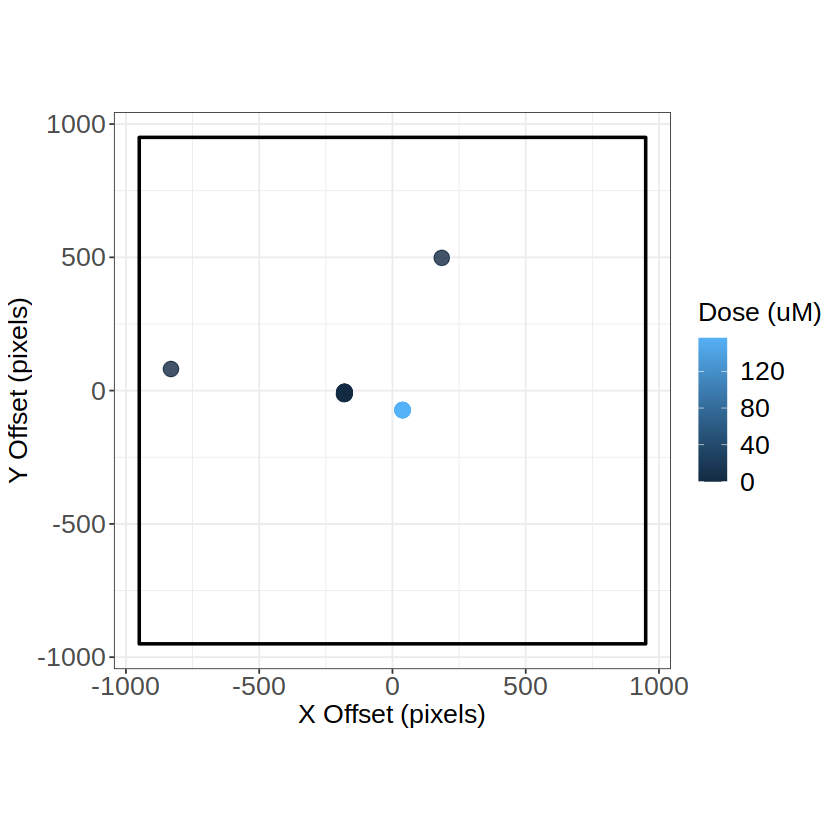

In [4]:
# plot the results
offsets_plot <- (
    ggplot(offset_df, aes(x = x_offset, y = y_offset))
    + geom_point(aes(color = dose), alpha = 0.8, size = 4)
    + theme_bw()
    + labs(
        x = "X Offset (pixels)",
        y = "Y Offset (pixels)",
        color = "Dose (uM)"
    )
    + theme(
        legend.position = "right",
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16)
    )
    # plot the box
    + geom_polygon(data = box_coordinates, aes(x = x, y = y), fill = NA, color = "black", size = 1)
    + ggplot2::coord_fixed(ratio = 1)
)
ggsave(
    offsets_plot,
    filename = "../figures/offsets_plot.png",
    width = 8,
    height = 8,
    dpi = 300
)
offsets_plot